## Build the Neural Network

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [2]:
device = (
    'cuda' if torch.cuda.is_available() else 'cpu'
)
device

'cuda'

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512,10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [5]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)
pred_prob, y_pred

(tensor([[0.0929, 0.0997, 0.1011, 0.1218, 0.1059, 0.0954, 0.0986, 0.0898, 0.1030,
          0.0919]], device='cuda:0', grad_fn=<SoftmaxBackward0>),
 tensor([3], device='cuda:0'))

### Model Layers
- Flatten
- Linear
- ReLU
- Sequential
- Softmax

In [6]:
input_image = torch.rand(3, 28, 28)
input_image.shape

torch.Size([3, 28, 28])

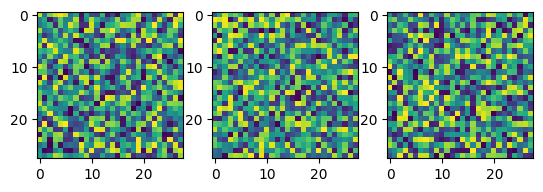

In [7]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,3)
for i in range(3):
    axes[i].imshow(input_image[i])
plt.show()

In [8]:
# flatten
flatten = nn.Flatten()
flat_img = flatten(input_image)
flat_img.shape

torch.Size([3, 784])

In [9]:
# linear
layer = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer(flat_img)
hidden1.shape

torch.Size([3, 20])

In [10]:
# relu
hidden2 = nn.ReLU()(hidden1)
hidden2.shape

torch.Size([3, 20])

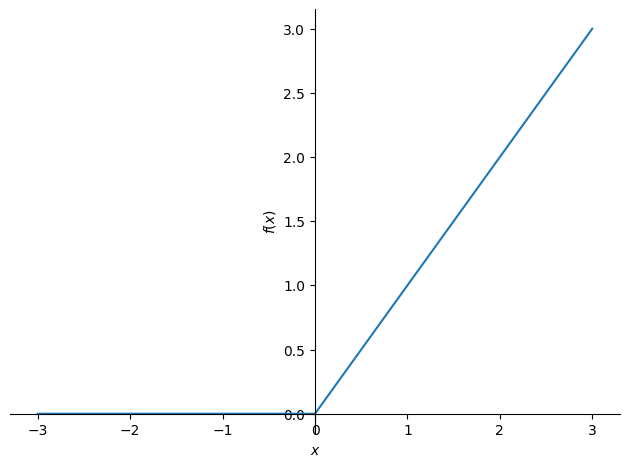

In [11]:
from sympy import symbols, Piecewise, plot
x = symbols('x')
relu_func = Piecewise((0, x < 0), (x, x>=0))
plot(relu_func, (x, -3, 3))

In [12]:
hidden1, hidden2

(tensor([[ 0.2242, -0.2600, -0.1679,  0.3481, -0.0673,  0.4502, -0.1257, -0.0337,
          -0.0379,  0.1570, -0.2102, -0.2456,  0.0916, -0.1394, -0.2233,  0.0165,
          -0.3560,  0.6359,  0.2810, -0.1455],
         [ 0.3306, -0.1987, -0.1661,  0.2280,  0.0320,  0.7110,  0.0637, -0.1189,
           0.1574, -0.0900,  0.1233, -0.3628, -0.1282,  0.0375, -0.0266,  0.0501,
          -0.5429,  0.7528,  0.5308,  0.0715],
         [ 0.2240, -0.3507, -0.0295, -0.1045, -0.1842,  0.5862, -0.0471,  0.2204,
           0.5107,  0.4321, -0.2531, -0.4031, -0.4153,  0.0296, -0.2872, -0.0653,
          -0.3461,  0.6639,  0.4576,  0.0442]], grad_fn=<AddmmBackward0>),
 tensor([[0.2242, 0.0000, 0.0000, 0.3481, 0.0000, 0.4502, 0.0000, 0.0000, 0.0000,
          0.1570, 0.0000, 0.0000, 0.0916, 0.0000, 0.0000, 0.0165, 0.0000, 0.6359,
          0.2810, 0.0000],
         [0.3306, 0.0000, 0.0000, 0.2280, 0.0320, 0.7110, 0.0637, 0.0000, 0.1574,
          0.0000, 0.1233, 0.0000, 0.0000, 0.0375, 0.0000, 0.0501, 

In [13]:
# sequential
outputs = nn.Sequential(
    flatten, 
    layer,
    nn.ReLU(),
    nn.Linear(20, 10)
)
logits = outputs(input_image)
logits.shape

torch.Size([3, 10])

In [14]:
# softmax
softmax = nn.Softmax(dim=1)
pred_prob = softmax(logits)
pred_prob.shape, pred_prob

(torch.Size([3, 10]),
 tensor([[0.1103, 0.1098, 0.0802, 0.0954, 0.1040, 0.0976, 0.1058, 0.0883, 0.0818,
          0.1268],
         [0.1095, 0.1170, 0.0822, 0.0996, 0.0958, 0.0905, 0.1077, 0.0888, 0.0797,
          0.1291],
         [0.0973, 0.1139, 0.0772, 0.1018, 0.0900, 0.0975, 0.1020, 0.0915, 0.0922,
          0.1366]], grad_fn=<SoftmaxBackward0>))

### Model Parameters
- weight
- bias

In [15]:
for name, param in model.named_parameters():
    print(name, param.size())

linear_relu_stack.0.weight torch.Size([512, 784])
linear_relu_stack.0.bias torch.Size([512])
linear_relu_stack.2.weight torch.Size([512, 512])
linear_relu_stack.2.bias torch.Size([512])
linear_relu_stack.4.weight torch.Size([10, 512])
linear_relu_stack.4.bias torch.Size([10])


### Training

In [16]:
# dataset & dataloader
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [17]:
# hyperparameter
learning_rate = 1e-3
batch_size = 64
epochs = 10

In [18]:
# loss function
loss_fn = nn.CrossEntropyLoss()

In [19]:
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [39]:
# train
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측 및 손실 계산
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0 and batch != 0:
            loss, current = loss.item(), (batch+1)*len(X)
            print(f'loss: {loss:>7f}, [{current:>5d}/{size:>5d}]')
        elif batch == int(size / batch_size):
            print(f'loss: {loss:>7f}, [{size:>5d}/{size:>5d}]')


In [38]:
# test
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y.to(device)).item()
            correct += (pred.argmax(1) == y.to(device)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {100*correct:>0.1f}, Avg loss: {test_loss:>8f}\n')

In [40]:
for t in range(epochs):
    print(f'Epoch {t+1}\n -----------------------------------------')
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print('Done!')

Epoch 1
 -----------------------------------------
loss: 0.526057, [ 6464/60000]
loss: 0.348232, [12864/60000]
loss: 0.589726, [19264/60000]
loss: 0.518269, [25664/60000]
loss: 0.520027, [32064/60000]
loss: 0.519883, [38464/60000]
loss: 0.666335, [44864/60000]
loss: 0.617945, [51264/60000]
loss: 0.486390, [57664/60000]
loss: 0.605748, [60000/60000]
Test Error: 
 Accuracy: 81.6, Avg loss: 0.519125

Epoch 2
 -----------------------------------------
loss: 0.521615, [ 6464/60000]
loss: 0.344756, [12864/60000]
loss: 0.584895, [19264/60000]
loss: 0.514094, [25664/60000]
loss: 0.515514, [32064/60000]
loss: 0.516116, [38464/60000]
loss: 0.666154, [44864/60000]
loss: 0.616028, [51264/60000]
loss: 0.481202, [57664/60000]
loss: 0.602667, [60000/60000]
Test Error: 
 Accuracy: 81.7, Avg loss: 0.516080

Epoch 3
 -----------------------------------------
loss: 0.517872, [ 6464/60000]
loss: 0.341497, [12864/60000]
loss: 0.580505, [19264/60000]
loss: 0.509710, [25664/60000]
loss: 0.511256, [32064/6000

### Model save & load

In [42]:
torch.save(model.state_dict(), 'model_weights.pth')

In [43]:
new_model = NeuralNetwork()

In [45]:
model, new_model

(NeuralNetwork(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (linear_relu_stack): Sequential(
     (0): Linear(in_features=784, out_features=512, bias=True)
     (1): ReLU()
     (2): Linear(in_features=512, out_features=512, bias=True)
     (3): ReLU()
     (4): Linear(in_features=512, out_features=10, bias=True)
   )
 ),
 NeuralNetwork(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (linear_relu_stack): Sequential(
     (0): Linear(in_features=784, out_features=512, bias=True)
     (1): ReLU()
     (2): Linear(in_features=512, out_features=512, bias=True)
     (3): ReLU()
     (4): Linear(in_features=512, out_features=10, bias=True)
   )
 ))

In [49]:
model.get_parameter

TypeError: get_parameter() missing 1 required positional argument: 'target'